In [0]:
import io
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")

import seaborn as sns
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
df1 = pd.read_csv(io.BytesIO(uploaded['id-1003_minutestepsnarrow_20171001_20171007.csv']))
df2 = pd.read_csv(io.BytesIO(uploaded['Raw_Data_90ADL.csv']))
df3 = pd.read_csv(io.BytesIO(uploaded['id-1003_heartrate_1min_20171001_20171007.csv']))

In [0]:
df1.head

<bound method NDFrame.head of               ActivityMinute  Steps
0      10/1/2017 12:00:00 AM      0
1      10/1/2017 12:01:00 AM      0
2      10/1/2017 12:02:00 AM      0
3      10/1/2017 12:03:00 AM      0
4      10/1/2017 12:04:00 AM      0
...                      ...    ...
11515  10/8/2017 11:55:00 PM      0
11516  10/8/2017 11:56:00 PM      0
11517  10/8/2017 11:57:00 PM      0
11518  10/8/2017 11:58:00 PM      0
11519  10/8/2017 11:59:00 PM      0

[11520 rows x 2 columns]>

In [0]:
len(df1), len(df2), len(df3)

(11520, 46752, 11273)

In [0]:
df1=df1[:2941]
df2=df2[:2941]
df3=df3[:2941]

In [0]:
len(df2)

2941

In [0]:
df1.columns

Index(['ActivityMinute', 'Steps'], dtype='object')

In [0]:
df2.columns

Index([' ms_accelerometer_x', ' ms_accelerometer_y', ' ms_accelerometer_z',
       'outcome'],
      dtype='object')

In [0]:
df3.columns

Index(['Time', 'Value'], dtype='object')

In [0]:
df_mock = pd.concat([df1, df2, df3], axis=1)

In [0]:
df_mock.head()
len(df_mock)

2941

In [0]:
cols = [1,2,3,4,7]
df_new = df_mock[df_mock.columns[cols]]

In [0]:
df_new.head()
len(df_new)

2941

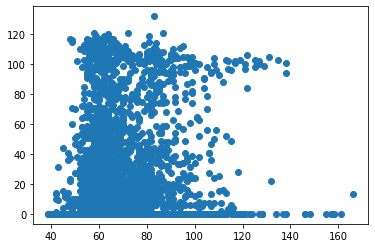

In [0]:
plt.scatter(df_new.Value, df_new.Steps )

In [0]:
from random import choices
outcome = np.random.choice([0,1], size=(2941,), p=[2./3,1./3])
dataframe=pd.DataFrame(outcome, columns=['outcome'])
print(dataframe)


      outcome
0           1
1           0
2           0
3           0
4           0
...       ...
2936        0
2937        0
2938        1
2939        0
2940        0

[2941 rows x 1 columns]


In [0]:
df_final = pd.concat([df_new, dataframe], axis=1)
df_final.head()
len(df_new)

2941

In [0]:
df_final.to_csv(r'\home\harsh\Desktop\database.csv',index=False,header=True)

In [0]:
export_file

In [0]:
df_copy = df_final.copy()
train_set = df_copy.sample(frac=0.80, random_state=0)
test_set = df_copy.drop(train_set.index)

train_set_labels = train_set.pop('outcome')
test_set_labels = test_set.pop('outcome')

#train_set_labels.head()
test_set_labels.head()

#y = df_final['outcome']
#X = df_final[:4]

#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

0     1
3     0
7     1
21    1
24    0
Name: outcome, dtype: int64

In [0]:
logreg = LogisticRegression()
logreg.fit(train_set, train_set_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(test_set)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(test_set, test_set_labels)))

Accuracy of logistic regression classifier on test set: 0.68


In [0]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,